Referências:
    
    - https://www.geeksforgeeks.org/priority-queue-in-python/?ref=oin_asr6
    
    Código inicial de filas. A partir deste, foram gerados as variações das filas propostas neste trabalho.

### Criação do conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import random
import seaborn as sns
#sns.set_style('whitegrid')

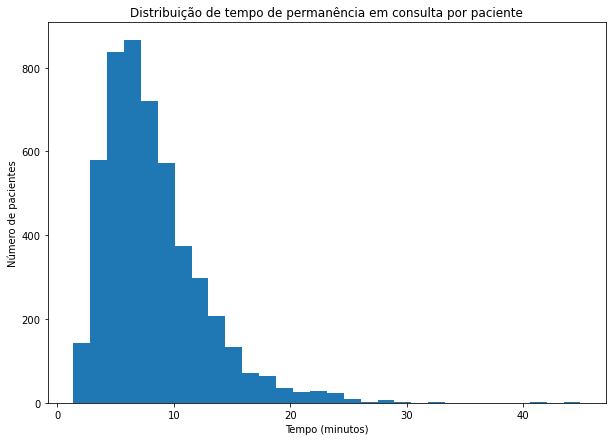

In [2]:
np.random.seed(10)
tempo_consulta = np.random.lognormal(mean=2, sigma=0.5, size=5000)

plt.figure(figsize=(10,7))
plt.hist(tempo_consulta, bins=30)
plt.xlabel('Tempo (minutos)')
plt.ylabel('Número de pacientes')
plt.title('Distribuição de tempo de permanência em consulta por paciente')
plt.savefig('Grafico1')

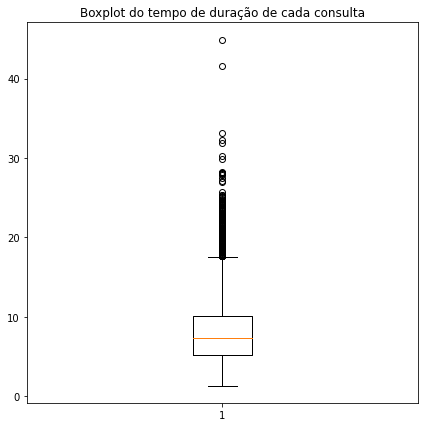

In [3]:
plt.figure(figsize=(7,7))
plt.boxplot(tempo_consulta)
plt.title('Boxplot do tempo de duração de cada consulta')
plt.savefig('Grafico2')

In [4]:
print('Tempo de consulta médio:',tempo_consulta.mean())
print('Tempo de consulta mediano:',np.median(tempo_consulta)) 
print('Tempo de consulta mínimo:',np.min(tempo_consulta))
print('Tempo de consulta máximo:',np.max(tempo_consulta))

Tempo de consulta médio: 8.229683016808611
Tempo de consulta mediano: 7.303019741038948
Tempo de consulta mínimo: 1.3686522469170208
Tempo de consulta máximo: 44.906401354633424


In [5]:
# Porcentagem em cada prioridade
random.seed(10)
p0, p1, p2, p3, p4 = 0.05 ,0.1,0.15, 0.40, 0.30

# CRISE 
#p0, p1, p2, p3, p4 = 0.75 ,0.05,0.05, 0.10, 0.05 

print('Soma das porcentagens(precisa ser igual a 1):', p0+p1+p2+p3+p4)

prioridade0 = np.random.randint(0, 1, int(p0*5000))
prioridade1 = np.random.randint(1, 2, int(p1*5000))
prioridade2 = np.random.randint(2, 3, int(p2*5000))
prioridade3 = np.random.randint(3, 4, int(p3*5000))
prioridade4 = np.random.randint(4, 5, int(p4*5000))

prioridades = np.concatenate((prioridade0,prioridade1,prioridade2,prioridade3,prioridade4))
random.shuffle(prioridades)

Soma das porcentagens(precisa ser igual a 1): 1.0


In [6]:
np.unique(prioridades, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 250,  500,  750, 2000, 1500], dtype=int64))

In [7]:
df = pd.DataFrame(([tempo_consulta, prioridades]), index=['tempo_atend', 'prio']).T

Publico inicial é de 10 pessoas aguardando. Sempre teremos este número de pessoas, potanto o dataframe varrera de 10 em 10 elementos. 

# Implementação sem prioridade nenhuma

In [8]:
# A simple implementation of Priority Queue
# using Queue.
class PriorityQueue(object):
    def __init__(self):
        self.tempo_atendimento = []
        self.priority = []
        self.waiting_time = []
        self.saida = []
 
    def __str__(self):
        return ' '.join([str(i) for i in self.tempo_atendimento])
 
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.tempo_atendimento) == 0
 
    # for inserting an element in the queue
    def insert(self, tempo_atendimento, priority):
        self.tempo_atendimento.append(tempo_atendimento)
        self.priority.append(priority)
        self.waiting_time.append(0)
 
    # for popping an element based on Priority
    def process(self):
        try:
            max_val = 0
#             for i in range(len(self.tempo_atendimento)-1):
#                 if self.priority[i] < self.priority[max_val]:
#                     max_val = i
            tempo = self.tempo_atendimento[max_val]
            
            self.saida.append([self.tempo_atendimento[max_val],self.priority[max_val],self.waiting_time[max_val]])
            
            del self.tempo_atendimento[max_val]
            del self.priority[max_val]
            del self.waiting_time[max_val]
            
            j=0
            for i in self.waiting_time:
                self.waiting_time[j] = i+tempo
                j+=1
            
            return self.waiting_time
        except IndexError:
            print()
            exit()

In [11]:
%%time
myQueue = PriorityQueue()

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])

Wall time: 387 ms


In [12]:
myQueue = PriorityQueue()

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])

In [13]:
results = pd.DataFrame(myQueue.saida, columns=['T_atend,', 'prio', 'T_espe'])

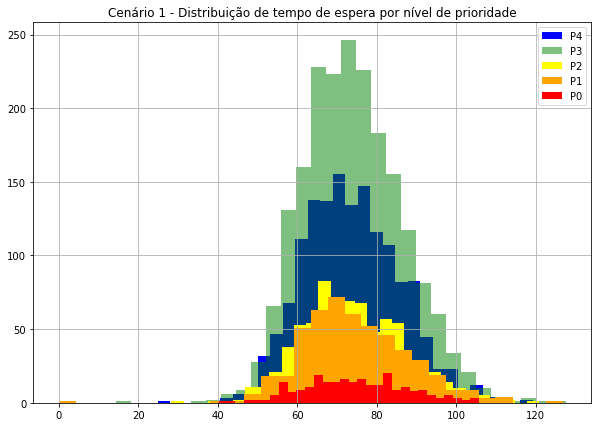

In [14]:
plt.figure(figsize=(10,7))
results[results.prio==4].T_espe.hist(bins=30, alpha=1, color='blue', label ='P4')
results[results.prio==3].T_espe.hist(bins=30, alpha=0.5, color='green', label ='P3')
results[results.prio==2].T_espe.hist(bins=30, alpha=1, color='yellow', label ='P2')
results[results.prio==1].T_espe.hist(bins=30, alpha=1, color='orange', label ='P1')
results[results.prio==0].T_espe.hist(bins=30, alpha=1, color='red', label ='P0')
plt.title('Cenário 1 - Distribuição de tempo de espera por nível de prioridade')
plt.legend()
plt.savefig('Grafico3')

### Tempo médio de atendimento e espera por prioridade

In [15]:
pd.pivot_table(results,
              index='prio',
               values='T_espe',
              aggfunc=['mean', 'std']
              )

,mean,std
,T_espe,T_espe
prio,,
0.0,74.554173,12.889852
1.0,74.616877,13.515663
2.0,74.025243,12.847311
3.0,73.972872,12.486777
4.0,73.794959,12.198444


In [16]:
results.T_espe.mean(), results.T_espe.median()

(74.0208835894851, 73.15488036275794)

# Implementação com prioridade simples

In [17]:
# A simple implementation of Priority Queue
# using Queue.
class PriorityQueue(object):
    def __init__(self):
        self.tempo_atendimento = []
        self.priority = []
        self.waiting_time = []
        self.saida = []
 
    def __str__(self):
        return ' '.join([str(i) for i in self.tempo_atendimento])
 
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.tempo_atendimento) == 0
 
    # for inserting an element in the queue
    def insert(self, tempo_atendimento, priority):
        self.tempo_atendimento.append(tempo_atendimento)
        self.priority.append(priority)
        self.waiting_time.append(0)
 
    # for popping an element based on Priority
    def process(self):
        try:
            max_val = 0
            for i in range(len(self.tempo_atendimento)-1):
                if self.priority[i] < self.priority[max_val]:
                    max_val = i
            tempo = self.tempo_atendimento[max_val]
            
            self.saida.append([self.tempo_atendimento[max_val],self.priority[max_val],self.waiting_time[max_val]])
            
            del self.tempo_atendimento[max_val]
            del self.priority[max_val]
            del self.waiting_time[max_val]
            
            j=0
            for i in self.waiting_time:
                self.waiting_time[j] = i+tempo
                j+=1
            
            return self.waiting_time
        except IndexError:
            print()
            exit()

## Iterando datast

In [18]:
%%time
myQueue = PriorityQueue()

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])


Wall time: 312 ms


In [19]:
myQueue = PriorityQueue()

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])


In [20]:
results = pd.DataFrame(myQueue.saida, columns=['T_atend,', 'prio', 'T_espe'])

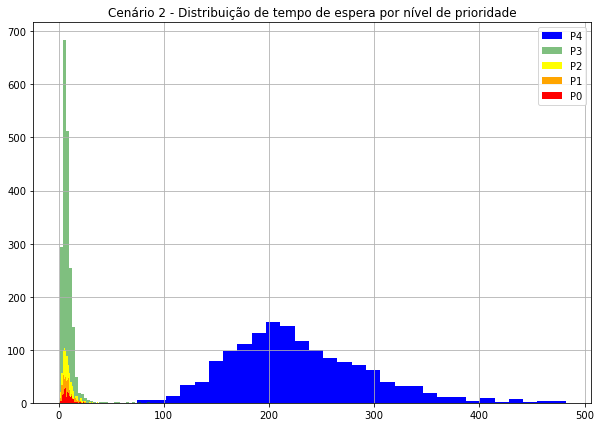

In [21]:
plt.figure(figsize=(10,7))
results[results.prio==4].T_espe.hist(bins=30, alpha=1, color='blue', label ='P4')
results[results.prio==3].T_espe.hist(bins=30, alpha=0.5, color='green', label ='P3')
results[results.prio==2].T_espe.hist(bins=30, alpha=1, color='yellow', label ='P2')
results[results.prio==1].T_espe.hist(bins=30, alpha=1, color='orange', label ='P1')
results[results.prio==0].T_espe.hist(bins=30, alpha=1, color='red', label ='P0')
plt.title('Cenário 2 - Distribuição de tempo de espera por nível de prioridade')
plt.legend()
plt.savefig('Grafico4')

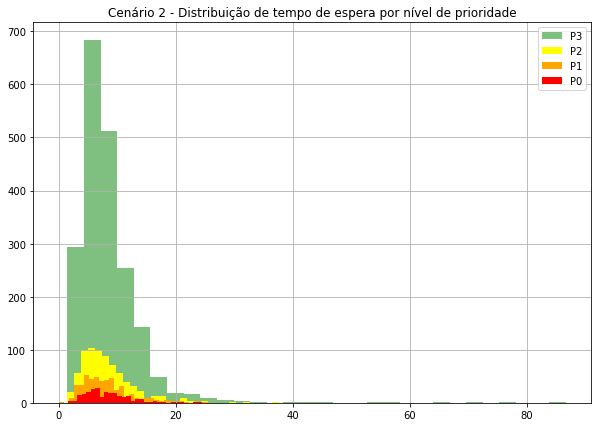

In [22]:
plt.figure(figsize=(10,7))
results[results.prio==3].T_espe.hist(bins=30, alpha=0.5, color='green', label ='P3')
results[results.prio==2].T_espe.hist(bins=30, alpha=1, color='yellow', label ='P2')
results[results.prio==1].T_espe.hist(bins=30, alpha=1, color='orange', label ='P1')
results[results.prio==0].T_espe.hist(bins=30, alpha=1, color='red', label ='P0')
plt.title('Cenário 2 - Distribuição de tempo de espera por nível de prioridade')
plt.legend()

In [23]:
results[results.prio!=4].describe([0.99])

,"T_atend,",prio,T_espe
count,3499.000000,3499.000000,3499.000000
mean,8.246764,2.286082,8.388153
std,4.283889,0.958342,5.332539
min,1.368652,0.000000,0.000000
50%,7.314720,3.000000,7.296004
99%,22.804485,3.000000,24.364559
max,44.906401,3.000000,86.668677


Aqui podemos enxergar que prioridade baixa está com um tempo médio muito alto, enquanto a prioridade 1 está praticamente com o mesmo tempo da prioridade 0. Precisamos pensar em algo que equilibre mais isso

### Tempo médio de atendimento e espera por prioridade

In [24]:
pd.pivot_table(results,
              index='prio',
               values='T_espe',
              aggfunc=['mean', 'std']
              )

,mean,std
,T_espe,T_espe
prio,,
0.0,8.410147,4.040414
1.0,8.266222,4.360106
2.0,8.323513,4.564579
3.0,8.440065,5.930864
4.0,227.873672,64.813668


In [25]:
results.T_espe.mean(), results.T_espe.median()

(73.96989784240375, 9.609011296373813)

# Implementação com prioridade justa

In [26]:
# A simple implementation of Priority Queue
# using Queue.
class PriorityQueue(object):
    def __init__(self, justica):
        '''
        justica: define o grau de justiça que o algoritmo irá trabalhar na fila de prioridade. 
        Quanto menor o número, incluindo negativos, mais justo tenderá a ser.
        
        '''
        self.tempo_atendimento = np.array([])
        self.priority = np.array([])
        self.waiting_time = np.array([])
        self.saida = []
        self.justica = justica
 
    def __str__(self):
        return ' '.join([str(i) for i in self.tempo_atendimento])
 
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.tempo_atendimento) == 0
 
    # for inserting an element in the queue
    def insert(self, tempo_atendimento, priority):
        self.tempo_atendimento = np.append(self.tempo_atendimento,tempo_atendimento)
        self.priority = np.append(self.priority,priority)
        self.waiting_time = np.append(self.waiting_time,0)
 
   
    # for popping an element based on Priority
    def process(self):
        #try:

        # Calcular os tempos de espera médios para cada prioridade  
        unique_priorities = np.unique(self.priority)  
        mean_waiting_times = np.array([self.waiting_time[self.priority == p].mean() for p in unique_priorities])  


        #df = pd.DataFrame([self.priority, self.waiting_time]).T.rename(columns={0:'prio', 1:'waiting'})
        max_val = 0
        for i in range(len(self.tempo_atendimento)-1):
            if self.priority[i] == 0:
                max_val = i
            elif self.priority[i] < self.priority[max_val]:
                # Obter os índices das prioridades para calcular a relação  
                index_0 = np.where(unique_priorities == self.priority[max_val])[0][0] 
                index_1 = np.where(unique_priorities == self.priority[i])[0][0] 
                # Calcular a relação  
                relacao = (mean_waiting_times[index_0] / mean_waiting_times[index_1]) -1
                if relacao<=self.justica:
                    max_val = i
                else:
                    break

        tempo = self.tempo_atendimento[max_val]
        self.saida.append([self.tempo_atendimento[max_val],
                                       self.priority[max_val],
                                       self.waiting_time[max_val]])

        self.tempo_atendimento = np.delete(self.tempo_atendimento, max_val)
        self.priority = np.delete(self.priority, max_val)
        self.waiting_time = np.delete(self.waiting_time, max_val)

        j=0
        for i in self.waiting_time:
            self.waiting_time[j] = i+tempo
            j+=1

        return self.waiting_time
#         except IndexError:
#             print()
#             exit()

## Justiça em 0.5

In [27]:
%%time
myQueue = PriorityQueue(0.5)

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])

Wall time: 1.01 s


In [28]:
myQueue = PriorityQueue(0.5)

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])

In [29]:
len(myQueue.saida)

4990

In [30]:
results = pd.DataFrame(myQueue.saida, columns=['T_atend,', 'prio', 'T_espe'])

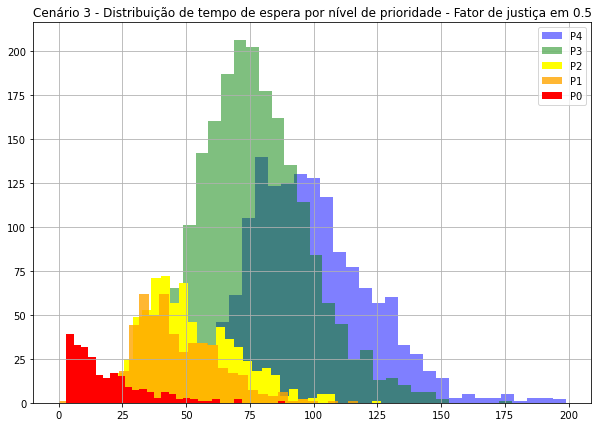

In [31]:
plt.figure(figsize=(10,7))
results[results.prio==4].T_espe.hist(bins=30, alpha=0.5, color='blue', label ='P4')
results[results.prio==3].T_espe.hist(bins=30, alpha=0.5, color='green', label ='P3')
results[results.prio==2].T_espe.hist(bins=30, alpha=1, color='yellow', label ='P2')
results[results.prio==1].T_espe.hist(bins=30, alpha=.8, color='orange', label ='P1')
results[results.prio==0].T_espe.hist(bins=30, alpha=1, color='red', label ='P0')
plt.title('Cenário 3 - Distribuição de tempo de espera por nível de prioridade - Fator de justiça em 0.5')
plt.legend()
plt.savefig('Grafico5')

Aqui podemos enxergar que prioridade baixa está com um tempo médio muito alto, enquanto a prioridade 1 está praticamente com o mesmo tempo da prioridade 0. Precisamos pensar em algo que equilibre mais isso

### Tempo médio de atendimento e espera por prioridade

In [32]:
pd.pivot_table(results,
              index='prio',
               values='T_espe',
              aggfunc=['mean', 'std']
              )

,mean,std
,T_espe,T_espe
prio,,
0.0,18.804002,14.578899
1.0,46.926726,16.243446
2.0,51.835330,18.036345
3.0,77.637801,20.494774
4.0,98.600877,23.851410


In [33]:
for i in ([0.0001, 10, 60, 120, 240]/(pd.pivot_table(results,
              index='prio',
               values='T_espe',
              aggfunc=['mean', 'std']
              ).values[:,0])-1)*100:
    print(f'{-i:.2f}%')

100.00%
78.69%
-15.75%
-54.56%
-143.41%


## Justiça em 1

In [35]:
%%time
myQueue = PriorityQueue(1)

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])

Wall time: 974 ms


In [36]:
myQueue = PriorityQueue(1)

#Adicionando primeiros 10 elementos do dataset à fila

for idx, col in df.iloc[0:10].iterrows():
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

# Processando paciente a paciente e inserindo um paciente por vez
for idx, col in df.iloc[10:].iterrows():
    myQueue.process()
    myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])

In [37]:
len(myQueue.saida)

4990

In [38]:
results = pd.DataFrame(myQueue.saida, columns=['T_atend,', 'prio', 'T_espe'])

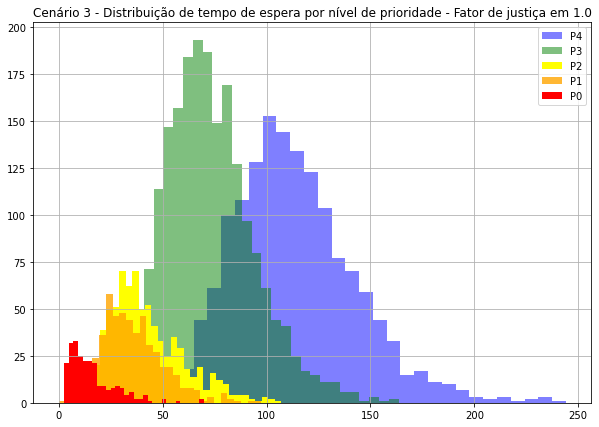

In [39]:
plt.figure(figsize=(10,7))
results[results.prio==4].T_espe.hist(bins=30, alpha=0.5, color='blue', label ='P4')
results[results.prio==3].T_espe.hist(bins=30, alpha=0.5, color='green', label ='P3')
results[results.prio==2].T_espe.hist(bins=30, alpha=1, color='yellow', label ='P2')
results[results.prio==1].T_espe.hist(bins=30, alpha=.8, color='orange', label ='P1')
results[results.prio==0].T_espe.hist(bins=30, alpha=1, color='red', label ='P0')
plt.title('Cenário 3 - Distribuição de tempo de espera por nível de prioridade - Fator de justiça em 1.0')
plt.legend()
plt.savefig('Grafico6')

### Tempo médio de atendimento e espera por prioridade

In [40]:
pd.pivot_table(results,
              index='prio',
               values='T_espe',
              aggfunc=['mean', 'std']
              )

,mean,std
,T_espe,T_espe
prio,,
0.0,15.987513,11.476213
1.0,36.681286,14.287527
2.0,42.746668,17.425985
3.0,72.839422,21.373741
4.0,113.446766,29.377018


### Alteranando o valor do fator de justica para ver um gráfico 

In [36]:
consolidado = {}
for fator in range(-20,20):
    fator/=10
    
    myQueue = PriorityQueue(fator)
    #Adicionando primeiros 10 elementos do dataset à fila
    for idx, col in df.iloc[0:10].iterrows():
        myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'],  )

    # Processando paciente a paciente e inserindo um paciente por vez
    for idx, col in df.iloc[10:].iterrows():
        myQueue.process()
        myQueue.insert(df.loc[idx,'tempo_atend'],df.loc[idx,'prio'])
        
    results = pd.DataFrame(myQueue.saida, columns=['T_atend,', 'prio', 'T_espe'])
    
    consolidado[fator] = pd.pivot_table(results,
              index='prio',
               values='T_espe',
              aggfunc=['mean', 'std']
              ).values[:,0]

In [37]:
df_final = pd.DataFrame(consolidado).T.iloc[10:]

In [38]:
df_final

,0,1,2,3,4
-1.0,29.616516,78.172432,77.084063,75.920863,75.956160
-0.9,29.616516,78.172432,77.084063,75.920863,75.956160
-0.8,29.616516,78.172432,77.084063,75.920863,75.956160
-0.7,29.616516,78.172432,77.084063,75.920863,75.956160
-0.6,29.546939,78.170487,77.022365,75.951311,75.958664
-0.5,29.167796,77.359646,76.423088,76.166970,76.309672
-0.4,28.359475,75.292998,75.082971,76.693762,77.097177
-0.3,26.963708,72.918394,72.783613,77.316965,78.447100
-0.2,27.180778,69.150242,70.058746,78.179824,79.894986
-0.1,25.524688,66.000403,67.215913,78.643111,82.015298


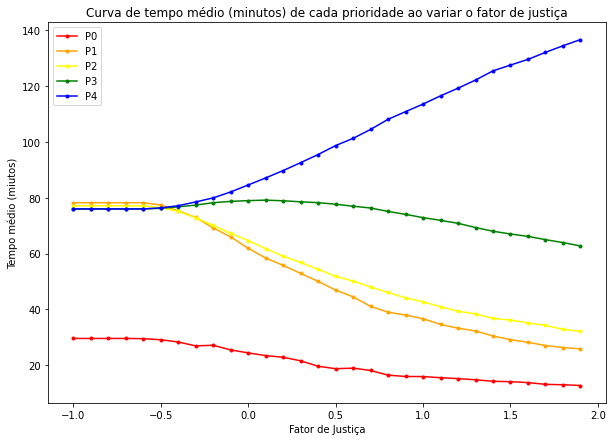

In [39]:
plt.figure(figsize=(10,7))

cores = {0:'red',1:'orange',2:'yellow',3:'green',4:'blue'}
for i, col in enumerate(df_final):
    plt.plot(df_final.index, df_final[col], label=col, color=cores[i], marker='.')

#plt.plot(df_final.iloc[13:], marker='o',color={'0':'red'})
plt.ylabel('Tempo médio (miutos)')
plt.xlabel('Fator de Justiça')
plt.legend(['P0','P1','P2','P3','P4'])
plt.title('Curva de tempo médio (minutos) de cada prioridade ao variar o fator de justiça')
plt.savefig('Grafico7')